<a href="https://colab.research.google.com/github/fikranaufal/Pemodelan-Matematika-NN02/blob/main/Koding_PEMOD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Berikut Merupakan Sumber Jurnal Yang Saya Gunakan Untuk Membuat Code**

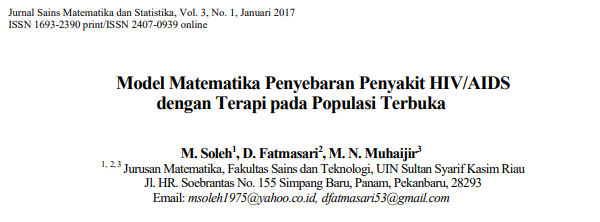

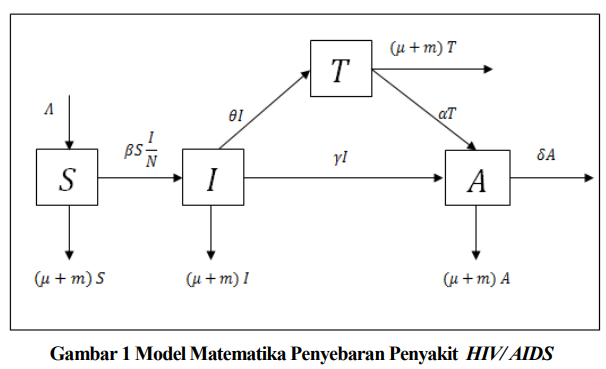

# **Pemodelan Penyebaran HIV/AIDS di Kota Bandung dengan SIAT**
Misalkan diberikan sebuah model persamaan diferensial yaitu
\begin{align}
  \frac{dS}{dt}&= \Lambda - \beta S\frac{I}{N}-(\mu + m)S \\
  \frac{dH}{dt}&= \beta S\frac{I}{N}- ϴI-\gamma I -(\mu + m)I \\
  \frac{dA}{dt}&= \gamma I- \alpha T-(\mu + m)T\\
  \frac{dT}{dt}&= ϴ I +\alpha T - \delta A -(\mu+m)A\\
\end{align}
dengan \\
S = Susceptible \\
H = HIV (Infected) \\
A = AIDS \\
T = Treatment \\
$\Lambda$ = Menyatakan laju recruitment pada kelas susceptible \\
$\mu$ = Menyatakan laju kematian alami \\
$m$ = Menyatakan laju emigrasi \\
$\beta$ = Menyatakan laju kontak antara individu terinfeksi HIV dengan individu sehat
$\gamma$ = Menyatakan laju transisi dari individu terinfeksi HIV menjadi pengidap AIDS \\
$\theta$ = Menyatakan laju perlakuan terapi yang diberikan kepada individu terinfeksi HIV \\
$\alpha $ = Menyatakan laju transisi dari individu yang memperoleh terapi menjadi pengidap AIDS \\
$\delta$ = Menyatakan laju kematian yang disebabkan oleh penyakit AIDS

# Import dan Fungsi (Wajib di Jalanin)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import Function, dsolve, solve, Derivative, symbols
from sympy.abc import x
import sympy as sp

# Fungsi Turunan
def derivatives(state,Λ,β,μ,m,θ,γ,α,δ):
  S, I, A, T = state
  N = S + I + A + T
  dS = Λ - β * S * I / N - (μ + m) * S
  dI = β * S * I / N - θ * I - γ * I - (μ + m) * I
  dA = γ * I + α * T - δ * A - (μ + m) * A
  dT = θ * I - α * T - (μ + m) * T
  return np.array([dS, dI, dA, dT])

# Fungsi Integrasi Dengan Runge–Kutta Orde 4
def runge_kutta(states,times, Λ, β, μ, m, θ, γ, α, δ, dt):
  for i in range(len(times) - 1):
    y = states[i]
    k1 = derivatives(y,Λ,β,μ,m,θ,γ,α,δ)
    k2 = derivatives(y + dt/2 * k1,Λ,β,μ,m,θ,γ,α,δ)
    k3 = derivatives(y + dt/2 * k2,Λ,β,μ,m,θ,γ,α,δ)
    k4 = derivatives(y + dt * k3,Λ,β,μ,m,θ,γ,α,δ)
    states[i + 1] = y + dt/6 * (k1 + 2*k2 + 2*k3 + k4)
  return states

# **1. Menyelesaikan Sistem Persamaan Diferensial Non Linier Yang Diberikan Dengan Menggunakan Parameter dan Nilai Awal Dari Jurnal (**BAGIAN INI JANGAN DI EDIT**)**

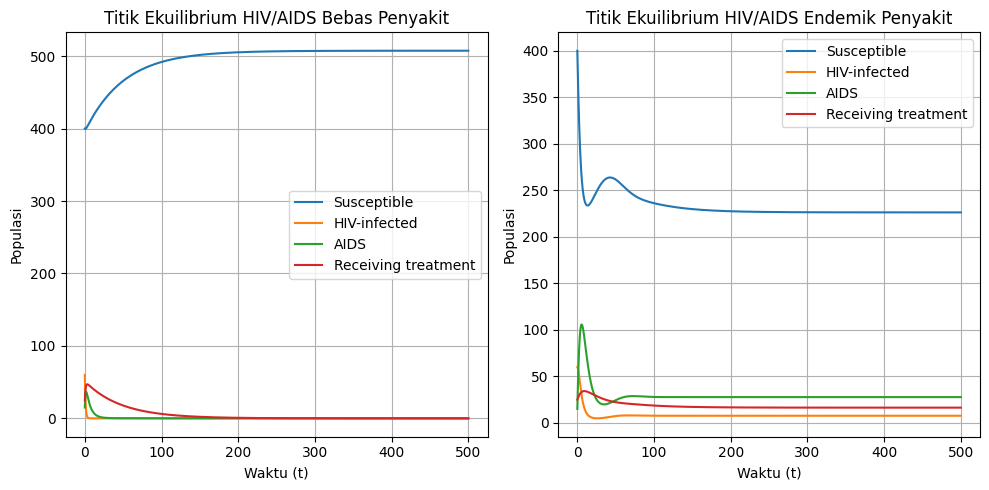

In [ ]:
# Parameter Model Bebas Penyakit
Λ = 10            # Menyatakan laju recruitment pada kelas susceptible
β = 0.0883856382  # Menyatakan laju kontak antara individu terinfeksi HIV dengan individu sehat
μ = 0.01470588    # Menyatakan laju kematian alami
m = 0.005         # Menyatakan laju emigrasi
θ = 0.4537        # Menyatakan laju perlakuan terapi yang diberikan kepada individu terinfeksi HIV
γ = 0.654004963   # Menyatakan laju transisi dari individu terinfeksi HIV menjadi pengidap AIDS
α = 0.0016        # Menyatakan laju transisi dari individu yang memperoleh terapi menjadi pengidap AIDS
δ = 0.163045919   # Menyatakan laju kematian yang disebabkan oleh penyakit AIDS

# Parameter Model Endemik
Λ_2 = 10          # Menyatakan laju recruitment pada kelas susceptible
β_2 = 0.883856382 # Menyatakan laju kontak antara individu terinfeksi HIV dengan individu sehat
μ_2 = 0.01470588  # Menyatakan laju kematian alami
m_2 = 0.005       # Menyatakan laju emigrasi
θ_2 = 0.04537     # Menyatakan laju perlakuan terapi yang diberikan kepada individu terinfeksi HIV
γ_2 = 0.654004963 # Menyatakan laju transisi dari individu terinfeksi HIV menjadi pengidap AIDS
α_2 = 0.0016      # Menyatakan laju transisi dari individu yang memperoleh terapi menjadi pengidap AIDS
δ_2 = 0.163045919 # Menyatakan laju kematian yang disebabkan oleh penyakit AIDS

# Kondisi Awal
S0 = 400          # Susceptible
I0 = 60           # HIV-infected
A0 = 15           # AIDS
T0 = 25           # Receiving treatment

# Waktu Simulasi
t0, t_end, dt = 0.0, 500, 0.1
times = np.linspace(t0, t_end, int((t_end - t0) / dt) + 1);

# Array Untuk Menyimpan Solusi Pertama
states = np.zeros((len(times), 4))
states_2 = np.zeros((len(times),4))
states[0] = [S0, I0, A0, T0]
states_2[0] = states[0]

# Panggil Fungsi dari Runge-kutta Orde 4
States = runge_kutta(states,times, Λ, β, μ, m, θ, γ, α, δ, dt)
States_2 = runge_kutta(states_2,times, Λ_2, β_2, μ_2, m_2, θ_2, γ_2, α_2, δ_2, dt)

# Plot hasil Runge Kutta 4 Dengan Menggunakan Matplotlib
fig, axs = plt.subplots(1,2) # Membuat matriks plot 2x2

axs[0].plot(times, States[:, 0], label='Susceptible')
axs[0].plot(times, States[:, 1], label='HIV-infected')
axs[0].plot(times, States[:, 2], label='AIDS')
axs[0].plot(times, States[:, 3], label='Receiving treatment')
axs[0].set_title('Titik Ekuilibrium HIV/AIDS Bebas Penyakit')
axs[0].set_xlabel('Waktu (t)')
axs[0].set_ylabel('Populasi')
axs[0].legend()
axs[0].grid(True)

axs[1].plot(times, States_2[:, 0], label='Susceptible')
axs[1].plot(times, States_2[:, 1], label='HIV-infected')
axs[1].plot(times, States_2[:, 2], label='AIDS')
axs[1].plot(times, States_2[:, 3], label='Receiving treatment')
axs[1].set_title('Titik Ekuilibrium HIV/AIDS Endemik Penyakit')
axs[1].set_xlabel('Waktu (t)')
axs[1].set_ylabel('Populasi')
axs[1].legend()
axs[1].grid(True)

fig.set_size_inches(10,5)
plt.tight_layout()
plt.show()

# **2. Solusi Dengan Menggunakan Parameter dan Nilai awal di Kota Bandung**

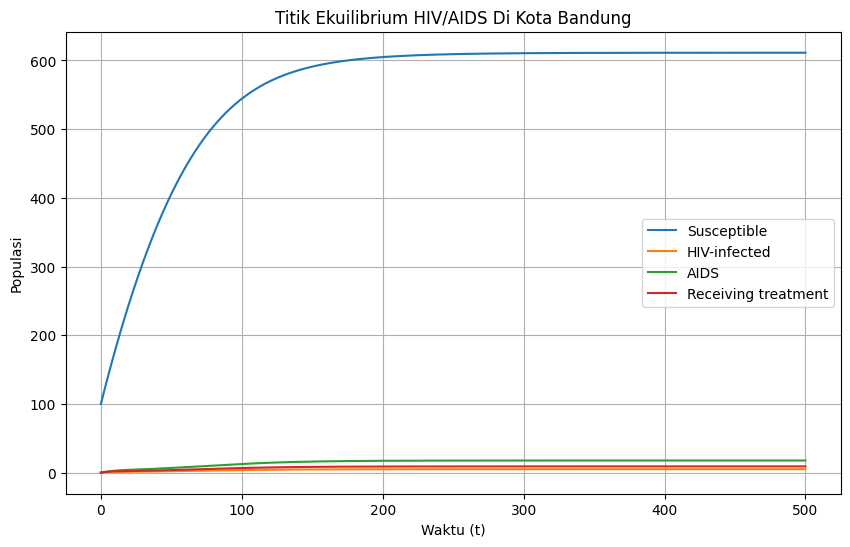

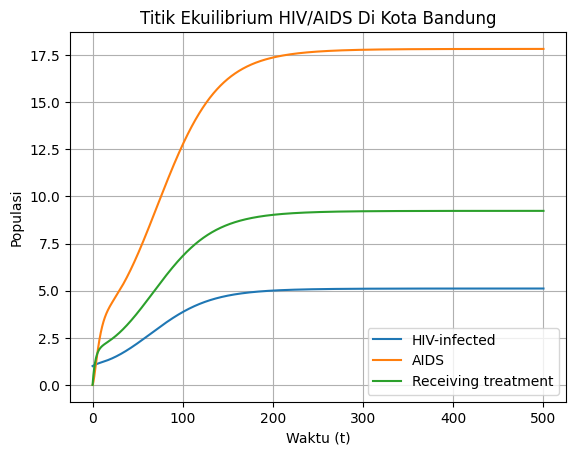

In [ ]:
# Parameter Model Di Kota Bandung
Λ_3 = 10    # Menyatakan laju recruitment pada kelas susceptible
β_3 = 0.8   # Menyatakan laju kontak antara individu terinfeksi HIV dengan individu sehat
μ_3 = 0.01  # Menyatakan laju kematian alami
m_3 = 0     # Menyatakan laju emigrasi
θ_3 = 0.65  # Menyatakan laju perlakuan terapi yang diberikan kepada individu terinfeksi HIV
γ_3 = 0.1   # Menyatakan laju transisi dari individu terinfeksi HIV menjadi pengidap AIDS
α_3 = 0.35  # Menyatakan laju transisi dari individu yang memperoleh terapi menjadi pengidap AIDS
δ_3 = 0.2   # Menyatakan laju kematian yang disebabkan oleh penyakit AIDS

# Kondisi Awal Di Kota Bandung
S0_3 = 100   # Susceptible
I0_3 = 1     # HIV-infected
A0_3 = 0     # AIDS
T0_3 = 0     # Receiving treatment

# Waktu Simulasi
t02, t_end2, dt = 0.0, 500, 0.1
times_2 = np.linspace(t02, t_end2, int((t_end2 - t02) / dt) + 1);

# Array Untuk Menyimpan Kondisi Pertama
states_3 = np.zeros((len(times_2),4))
states_3[0] = [S0_3,I0_3,A0_3,T0_3]

# Panggil Fungsi dari Runge-kutta Orde 4
States_3 = runge_kutta(states_3,times_2, Λ_3, β_3, μ_3, m_3, θ_3, γ_3, α_3, δ_3, dt)

# Plot Hasil Dari Runge-Kutta 4
fig = plt.figure()
fig.set_size_inches(10,6)
plt.plot(times_2, States_3[:, 0], label='Susceptible') # Plot hasil Susceptible
plt.plot(times_2, States_3[:, 1], label='HIV-infected') # Plot hasil Infected
plt.plot(times_2, States_3[:, 2], label='AIDS') # Plot hasil AIDS
plt.plot(times_2, States_3[:, 3], label='Receiving treatment') # Plot hasil Treatment
plt.title('Titik Ekuilibrium HIV/AIDS Di Kota Bandung')
plt.xlabel('Waktu (t)')
plt.ylabel('Populasi')
plt.legend()
plt.grid(True)
plt.show()

# Plot tanpa S
plt.plot(times_2, States_3[:, 1], label='HIV-infected') # Plot hasil Infected
plt.plot(times_2, States_3[:, 2], label='AIDS') # Plot hasil AIDS
plt.plot(times_2, States_3[:, 3], label='Receiving treatment') # Plot hasil Treatment
plt.title('Titik Ekuilibrium HIV/AIDS Di Kota Bandung')
plt.xlabel('Waktu (t)')
plt.ylabel('Populasi')
plt.legend()
plt.grid(True)
plt.show()

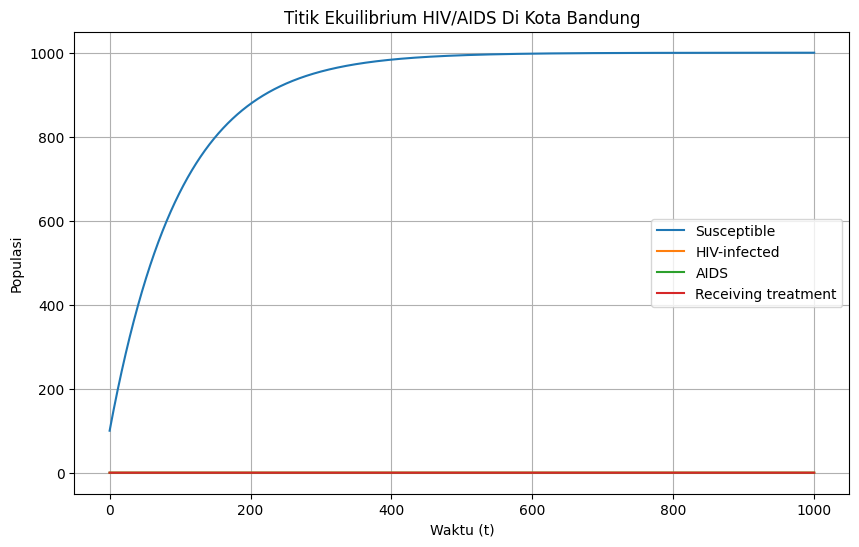

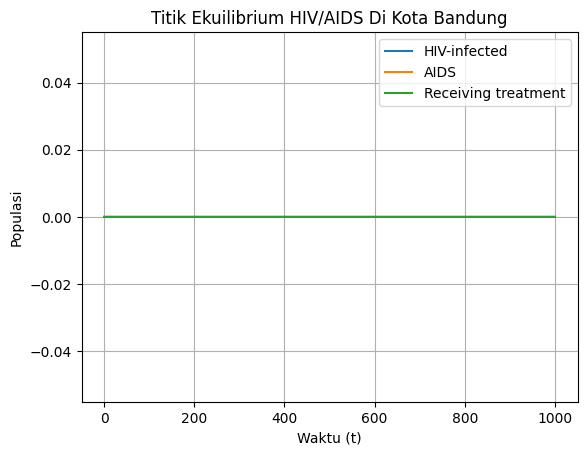

In [ ]:
# Parameter Model Di Kota Bandung
Λ_4 = 10    # Menyatakan laju recruitment pada kelas susceptible
β_4 = 0.8   # Menyatakan laju kontak antara individu terinfeksi HIV dengan individu sehat
μ_4 = 0.01  # Menyatakan laju kematian alami
m_4 = 0     # Menyatakan laju emigrasi
θ_4 = 0.65  # Menyatakan laju perlakuan terapi yang diberikan kepada individu terinfeksi HIV
γ_4 = 0.1   # Menyatakan laju transisi dari individu terinfeksi HIV menjadi pengidap AIDS
α_4 = 0.35  # Menyatakan laju transisi dari individu yang memperoleh terapi menjadi pengidap AIDS
δ_4 = 0.2   # Menyatakan laju kematian yang disebabkan oleh penyakit AIDS

# Kondisi Awal Di Kota Bandung
S0_4 = 100   # Susceptible
I0_4 = 0     # HIV-infected
A0_4 = 0     # AIDS
T0_4 = 0     # Receiving treatment

# Waktu Simulasi
t03, t_end3 = 0.0, 1000
times_3 = np.linspace(t03, t_end3, int((t_end3 - t03) / dt) + 1);

# Array Untuk Menyimpan Kondisi Pertama
states_4 = np.zeros((len(times_3),4))
states_4[0] = [S0_4,I0_4,A0_4,T0_4]

# Panggil Fungsi dari Runge-kutta Orde 4
States_4 = runge_kutta(states_4,times_3, Λ_4, β_4, μ_4, m_4, θ_4, γ_4, α_4, δ_4, dt)

# Plot Hasil Dari Runge-Kutta 4
fig = plt.figure()
fig.set_size_inches(10,6)
plt.plot(times_3, States_4[:, 0], label='Susceptible') # Plot hasil Susceptible
plt.plot(times_3, States_4[:, 1], label='HIV-infected') # Plot hasil Infected
plt.plot(times_3, States_4[:, 2], label='AIDS') # Plot hasil AIDS
plt.plot(times_3, States_4[:, 3], label='Receiving treatment') # Plot hasil Treatment
plt.title('Titik Ekuilibrium HIV/AIDS Di Kota Bandung')
plt.xlabel('Waktu (t)')
plt.ylabel('Populasi')
plt.legend()
plt.grid(True)
plt.show()

# Plot tanpa S
plt.plot(times_3, States_4[:, 1], label='HIV-infected') # Plot hasil Infected
plt.plot(times_3, States_4[:, 2], label='AIDS') # Plot hasil AIDS
plt.plot(times_3, States_4[:, 3], label='Receiving treatment') # Plot hasil Treatment
plt.title('Titik Ekuilibrium HIV/AIDS Di Kota Bandung')
plt.xlabel('Waktu (t)')
plt.ylabel('Populasi')
plt.legend()
plt.grid(True)
plt.show()

# **3. Nilai Eigen Matriks Jacobi**

In [ ]:
Λ,β,μ,m,θ,γ,α,δ,S,I,N = sp.symbols('Λ β μ m θ γ α δ S I N')

# Definisi diagonal utama
a1 = -β*(I/N)-μ
a2 = β*(S/N)-(θ+γ+μ)
a3 = -(α+μ)
a4 = -(δ+μ)

# Definisi diagonal lainnya
b1 = β*(I/N)
b2 = -β*(S/N)
b3 = θ
b4 = γ
b5 = α

# Buat matriks Jacobi 4x4
J = sp.Matrix([
    [a1, b2,  0,  0],
    [b1, a2, 0,  0],
    [ 0, b3, a3, 0],
    [ 0, b4, b5, a4]
])

# Tampilkan matriks
print("Matriks Jacobi:")
sp.pprint(J)

# Hitung eigenvalues secara simbolik
eigenvals = J.eigenvals()

# Tampilkan eigenvalues
print("\nEigenvalues:")
for val, mult in eigenvals.items():
    print(f"{val} (multiplicity {mult})")

Matriks Jacobi:
⎡  I⋅β           -S⋅β                       ⎤
⎢- ─── - μ       ─────          0       0   ⎥
⎢   N              N                        ⎥
⎢                                           ⎥
⎢   I⋅β                  S⋅β                ⎥
⎢   ───     -γ - θ - μ + ───    0       0   ⎥
⎢    N                    N                 ⎥
⎢                                           ⎥
⎢    0             θ          -α - μ    0   ⎥
⎢                                           ⎥
⎣    0             γ            α     -δ - μ⎦

Eigenvalues:
-(I*β + N*γ + N*θ + 2*N*μ - S*β)/(2*N) - sqrt(I**2*β**2 - 2*I*N*β*γ - 2*I*N*β*θ - 2*I*S*β**2 + N**2*γ**2 + 2*N**2*γ*θ + N**2*θ**2 - 2*N*S*β*γ - 2*N*S*β*θ + S**2*β**2)/(2*N) (multiplicity 1)
-(I*β + N*γ + N*θ + 2*N*μ - S*β)/(2*N) + sqrt(I**2*β**2 - 2*I*N*β*γ - 2*I*N*β*θ - 2*I*S*β**2 + N**2*γ**2 + 2*N**2*γ*θ + N**2*θ**2 - 2*N*S*β*γ - 2*N*S*β*θ + S**2*β**2)/(2*N) (multiplicity 1)
-α - μ (multiplicity 1)
-δ - μ (multiplicity 1)
